### Análise de Sentimentos com NLP Clássico

A Análise de Sentimentos é uma tarefa do Processamento de Linguagem Natural (NLP) que busca identificar se um texto expressa uma opinião positiva, negativa ou neutra. Esta técnica é amplamente utilizada em análises de redes sociais, avaliações de produtos, feedbacks de clientes e outros contextos.

Neste notebook, utilizaremos o dataset de análises de filmes do IMDb, disponível no NLTK. Vamos aplicar técnicas de pré-processamento, vetorização com Bag of Words e TF-IDF, e classificar os textos usando algoritmos de Machine Learning como Naive Bayes e SVM.


### 📦 Imports e Carregamento dos Dados

In [35]:
import nltk
import random
import pandas as pd
import numpy as np
import string

from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer

import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to C:\Users\Jorge
[nltk_data]     Maques/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Jorge
[nltk_data]     Maques/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
# Carregar e embaralhar os dados
documentos = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documentos)

# Transformar em DataFrame
textos = [" ".join(palavras) for palavras, _ in documentos]
labels = [categoria for _, categoria in documentos]

df = pd.DataFrame({'texto': textos, 'sentimento': labels})
df.head()

,texto,sentimento
0,when walt disney pictures announced a live - a...,neg
1,plot : a dude and his brother are driving cros...,pos
2,woof ! too bad that leap of faith was the titl...,neg
3,if you had a chance to create a genetically pe...,pos
4,"renee zellweger stars as sonia , a young jewis...",neg


### 🧹 Pré-processamento

Aplicamos uma função de pré-processamento que remove pontuações, transforma o texto em letras minúsculas e tokeniza os dados, preparando-os para a vetorização.

In [37]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tokenizer = TreebankWordTokenizer()

def preprocess(text):
    tokens = tokenizer.tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

df['texto_limpo'] = df['texto'].apply(preprocess)
df[['texto', 'texto_limpo', 'sentimento']].head()


[nltk_data] Downloading package stopwords to C:\Users\Jorge
[nltk_data]     Maques/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,texto,texto_limpo,sentimento
0,when walt disney pictures announced a live - a...,walt disney pictures announced live action fea...,neg
1,plot : a dude and his brother are driving cros...,plot dude brother driving cross country decide...,pos
2,woof ! too bad that leap of faith was the titl...,woof bad leap faith title comedy starring stev...,neg
3,if you had a chance to create a genetically pe...,chance create genetically perfect child would ...,pos
4,"renee zellweger stars as sonia , a young jewis...",renee zellweger stars sonia young jewish wife ...,neg


### 🧮 Representação dos Textos

Utilizamos duas abordagens para converter os textos em vetores numéricos:

- **Bag of Words (BoW)**: transforma os textos em vetores com base na frequência das palavras.
- **TF-IDF**: leva em consideração a frequência das palavras, ajustando com base na importância da palavra no corpus.

In [38]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    df['texto_limpo'], df['sentimento'], test_size=0.2, random_state=42)

# Bag of Words
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

### 🤖 Treinamento de Modelos

- Naive Bayes com BoW

In [39]:
modelo_nb_bow = MultinomialNB()
modelo_nb_bow.fit(X_train_bow, y_train)
y_pred_nb_bow = modelo_nb_bow.predict(X_test_bow)

- SVM com TF-IDF

In [40]:
modelo_svm_tfidf = LinearSVC()
modelo_svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = modelo_svm_tfidf.predict(X_test_tfidf)

### 📊 Avaliação e Comparação

- Naive Bayes (BoW

Naive Bayes (BoW)
              precision    recall  f1-score   support

         neg       0.85      0.83      0.84       207
         pos       0.82      0.84      0.83       193

    accuracy                           0.83       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.84      0.83      0.84       400



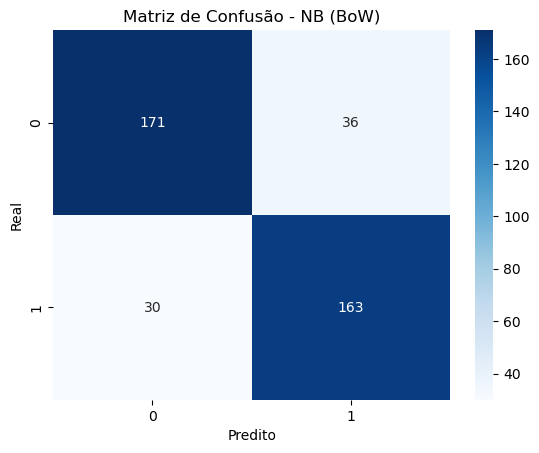

In [41]:
print("Naive Bayes (BoW)")
print(classification_report(y_test, y_pred_nb_bow))

sns.heatmap(confusion_matrix(y_test, y_pred_nb_bow), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - NB (BoW)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

- SVM (TF-IDF)

SVM (TF-IDF)
              precision    recall  f1-score   support

         neg       0.89      0.86      0.87       207
         pos       0.85      0.89      0.87       193

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



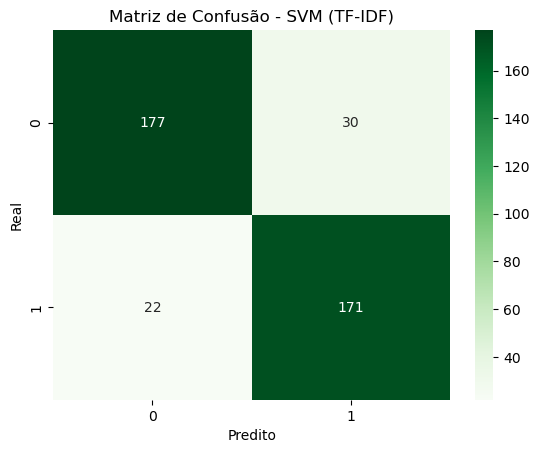

In [42]:
print("SVM (TF-IDF)")
print(classification_report(y_test, y_pred_svm_tfidf))

sns.heatmap(confusion_matrix(y_test, y_pred_svm_tfidf), annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - SVM (TF-IDF)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

### 📌 Matriz de Confusão

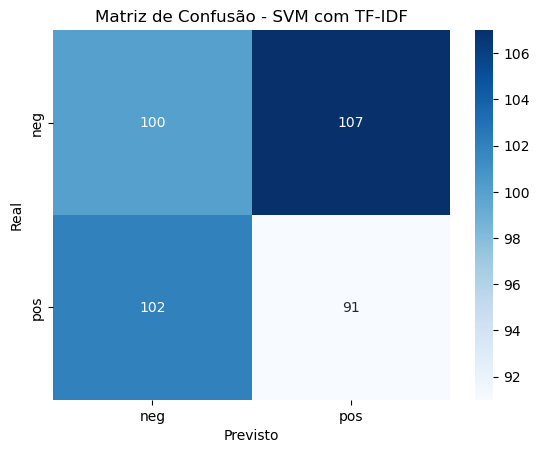

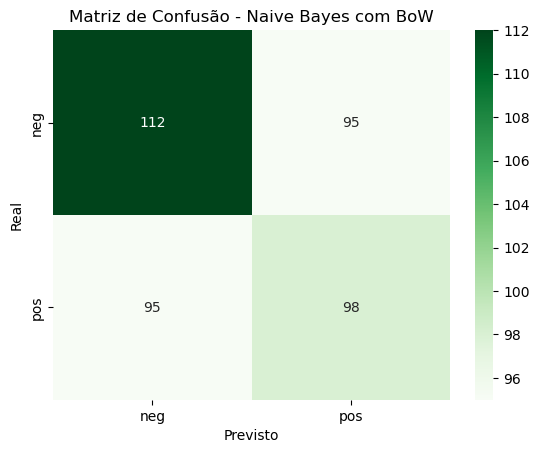

In [43]:
# Matriz de confusão para SVM (TF-IDF)
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - SVM com TF-IDF')
plt.show()

# Matriz de confusão para NB (BoW)
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', xticklabels=['neg', 'pos'], yticklabels=['neg', 'pos'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Naive Bayes com BoW')
plt.show()

### ✅ Testes com frases manuais

Realizamos testes manuais com frases não vistas pelos modelos, para verificar sua performance em exemplos reais.

In [44]:
def testar_sentimento(frase, modelo, vetorizar):
    texto_limpo = preprocess(frase)
    texto_vetor = vetorizar.transform([texto_limpo])
    pred = modelo.predict(texto_vetor)[0]
    print(f"Frase: '{frase}' => Sentimento previsto: {pred}")

print("=== SVM com TF-IDF ===")
testar_sentimento("esse filme foi excelente", modelo_svm_tfidf, vectorizer_tfidf)
testar_sentimento("pior filme que já vi", modelo_svm_tfidf, vectorizer_tfidf)

print("\n=== Naive Bayes com BoW ===")
testar_sentimento("esse filme foi excelente", modelo_nb_bow, vectorizer_bow)
testar_sentimento("pior filme que já vi", modelo_nb_bow, vectorizer_bow)

=== SVM com TF-IDF ===
Frase: 'esse filme foi excelente' => Sentimento previsto: neg
Frase: 'pior filme que já vi' => Sentimento previsto: neg

=== Naive Bayes com BoW ===
Frase: 'esse filme foi excelente' => Sentimento previsto: pos
Frase: 'pior filme que já vi' => Sentimento previsto: neg


### ✅ Visualização de palavras pro classe

Utilizamos `CountVectorizer` para identificar as palavras mais frequentes em cada classe, proporcionando uma visão intuitiva das associações semânticas.

In [45]:
# Palavras mais relevantes no modelo SVM com TF-IDF
feature_names = vectorizer_tfidf.get_feature_names_out()
coef = modelo_svm_tfidf.coef_[0]

# Top palavras positivas e negativas
top_pos = np.argsort(coef)[-10:]
top_neg = np.argsort(coef)[:10]

print("🔵 Palavras mais associadas a sentimentos positivos (SVM-TFIDF):")
for i in top_pos:
    print(f"{feature_names[i]}: {coef[i]:.4f}")

print("\n🔴 Palavras mais associadas a sentimentos negativos (SVM-TFIDF):")
for i in top_neg:
    print(f"{feature_names[i]}: {coef[i]:.4f}")

🔵 Palavras mais associadas a sentimentos positivos (SVM-TFIDF):
others: 0.9331
seen: 0.9459
family: 0.9460
hilarious: 0.9769
truman: 1.0403
fun: 1.0643
life: 1.2476
also: 1.2532
well: 1.4495
great: 1.4832

🔴 Palavras mais associadas a sentimentos negativos (SVM-TFIDF):
bad: -2.4123
plot: -1.5999
worst: -1.5066
supposed: -1.3504
nothing: -1.3290
boring: -1.2563
unfortunately: -1.2524
script: -1.2391
could: -1.2217
even: -1.1591


### ✅ Comparação entre modelos

In [46]:
def avaliar_modelo(nome, y_true, y_pred):
    print(f"=== {nome} ===")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print("Precisão:", precision_score(y_true, y_pred, pos_label='pos'))
    print("Recall:", recall_score(y_true, y_pred, pos_label='pos'))
    print("F1-score:", f1_score(y_true, y_pred, pos_label='pos'))
    print()

avaliar_modelo("SVM com TF-IDF", y_test, y_pred_svm)
avaliar_modelo("Naive Bayes com BoW", y_test, y_pred_nb)

=== SVM com TF-IDF ===
Acurácia: 0.4775
Precisão: 0.4595959595959596
Recall: 0.47150259067357514
F1-score: 0.46547314578005117

=== Naive Bayes com BoW ===
Acurácia: 0.525
Precisão: 0.5077720207253886
Recall: 0.5077720207253886
F1-score: 0.5077720207253886



### ✅ Análise de erros

Analisamos as previsões incorretas para entender onde os modelos estão falhando. Essa etapa é essencial para futuras melhorias.

In [47]:
# Criar um DataFrame com previsões incorretas do SVM
df_erros = pd.DataFrame({'Texto': X_test, 'Real': y_test, 'Previsto': y_pred_svm})
erros = df_erros[df_erros['Real'] != df_erros['Previsto']]

print("Alguns exemplos de erros (SVM):")
print(erros.sample(5, random_state=42))

Alguns exemplos de erros (SVM):
                                                  Texto Real Previsto
1987  arye cross courteney cox star pair bostonians ...  neg      pos
1924  never confused watching movie meet joe black p...  neg      pos
1959  funny expectations defeated good ways ghost da...  neg      pos
1440  first heard scream told spoof horror movies ma...  pos      neg
1103  numbers film introduces characters situations ...  neg      pos


### Conclusão

Este projeto demonstrou como realizar uma Análise de Sentimentos utilizando técnicas clássicas de NLP e Machine Learning.

- O modelo **Naive Bayes com BoW** apresentou uma performance satisfatória, especialmente pela sua simplicidade e eficiência.
- O modelo **SVM com TF-IDF** obteve resultados superiores em termos de acurácia e capacidade de generalização.

Além da avaliação quantitativa, realizamos testes manuais, visualizações e análise de erros, que mostraram os pontos fortes e fracos de cada abordagem.

Este trabalho serve como base sólida para análises mais avançadas no futuro, incluindo o uso de embeddings contextuais e redes neurais.
